# Load Dataset

In [4]:
import kagglehub
import pandas as pd
import os

# Download latest version of the dataset
print("Downloading dataset...")
path = kagglehub.dataset_download("samayashar/fraud-detection-transactions-dataset")
print("Dataset downloaded to:", path)

csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if not csv_files:
    print("No CSV files found in the downloaded directory.")
else:
    # Assuming the first CSV file found is the main data file
    data_file_path = os.path.join(path, csv_files[0])
    print(f"Loading data from: {data_file_path}")

    # Load the dataset into a pandas DataFrame
    try:
        df = pd.read_csv(data_file_path)

        # Display the first few rows
        print("\nFirst 5 rows of the dataset:")
        print(df.head())

        # Display feature names and their data types
        print("\nFeature names and data types:")
        df.info()

    except Exception as e:
        print(f"Error loading data or displaying info: {e}")

Dataset downloaded to: C:\Users\xrzha\.cache\kagglehub\datasets\samayashar\fraud-detection-transactions-dataset\versions\1
Loading data from: C:\Users\xrzha\.cache\kagglehub\datasets\samayashar\fraud-detection-transactions-dataset\versions\1\synthetic_fraud_dataset.csv

First 5 rows of the dataset:
  Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         

# Detecting Data Availability

In [6]:
import pandas as pd

# Check missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

print("\nTotal missing values in the dataset:")
print(df.isnull().sum().sum())

print("\nPercentage of missing values per column:")
print(df.isnull().sum() / len(df) * 100)


Missing values per column:
Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

Total missing values in the dataset:
0

Percentage of missing values per column:
Transaction_ID                  0.0
User_ID                         0.0
Transaction_Amount              0.0
Transaction_Type                0.0
Timestamp          

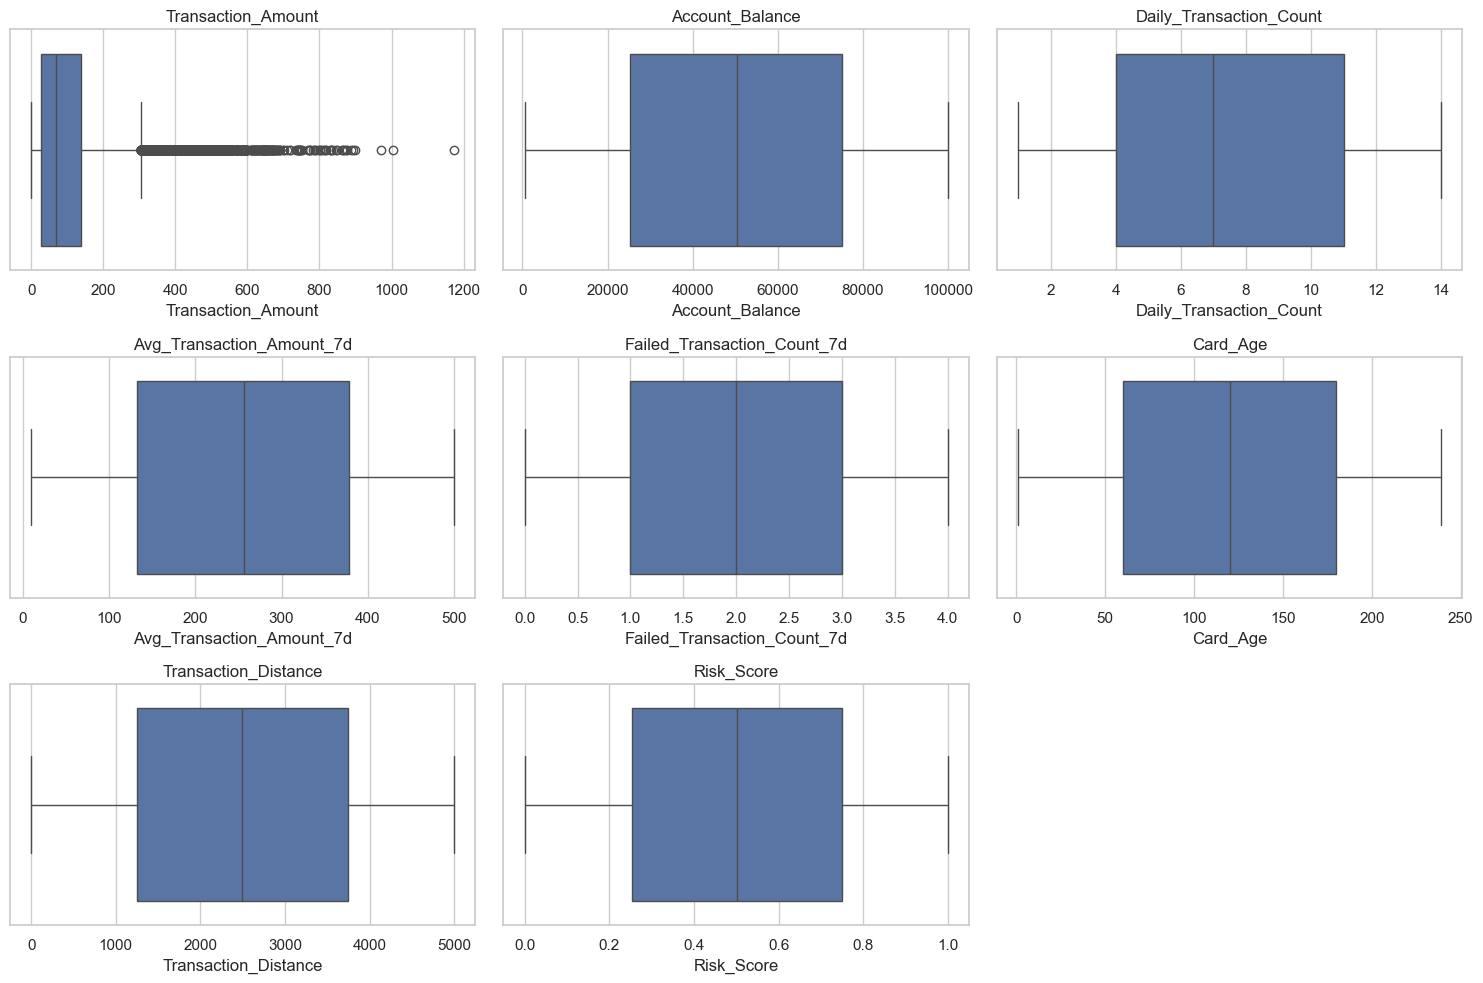


Outlier boundaries using IQR method (Q1 - 1.5*IQR, Q3 + 1.5*IQR):
Transaction_Amount: Lower Bound = -136.58, Upper Bound = 304.12
  Number of outliers: 2260
--------------------
Account_Balance: Lower Bound = -49282.72, Upper Bound = 149753.85
  Number of outliers: 0
--------------------
Daily_Transaction_Count: Lower Bound = -6.50, Upper Bound = 21.50
  Number of outliers: 0
--------------------
Avg_Transaction_Amount_7d: Lower Bound = -236.83, Upper Bound = 746.95
  Number of outliers: 0
--------------------
Failed_Transaction_Count_7d: Lower Bound = -2.00, Upper Bound = 6.00
  Number of outliers: 0
--------------------
Card_Age: Lower Bound = -120.00, Upper Bound = 360.00
  Number of outliers: 0
--------------------
Transaction_Distance: Lower Bound = -2478.35, Upper Bound = 7481.24
  Number of outliers: 0
--------------------
Risk_Score: Lower Bound = -0.49, Upper Bound = 1.49
  Number of outliers: 0
--------------------


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

# Select columns of values that potentially contain outliers
numerical_cols_for_outliers = [
    'Transaction_Amount',
    'Account_Balance',
    'Daily_Transaction_Count',
    'Avg_Transaction_Amount_7d',
    'Failed_Transaction_Count_7d',
    'Card_Age',
    'Transaction_Distance',
    'Risk_Score'
]

# Plotting box-and-line diagrams for visual inspection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_for_outliers):
    plt.subplot(3, 3, i + 1) 
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout() 
plt.show()

# Calculate outlier boundaries for each column using the IQR method
print("\nOutlier boundaries using IQR method (Q1 - 1.5*IQR, Q3 + 1.5*IQR):")
for col in numerical_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{col}: Lower Bound = {lower_bound:.2f}, Upper Bound = {upper_bound:.2f}")

    # Counting the number of outliers
    outliers_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    print(f"  Number of outliers: {outliers_count}")
    print("-" * 20)


Capping Transaction_Amount at: 304.12

Transaction_Amount descriptive stats (after capping):
count    50000.000000
mean        94.916685
std         83.505673
min          0.000000
25%         28.677500
50%         69.660000
75%        138.852500
max        304.115000
Name: Transaction_Amount, dtype: float64


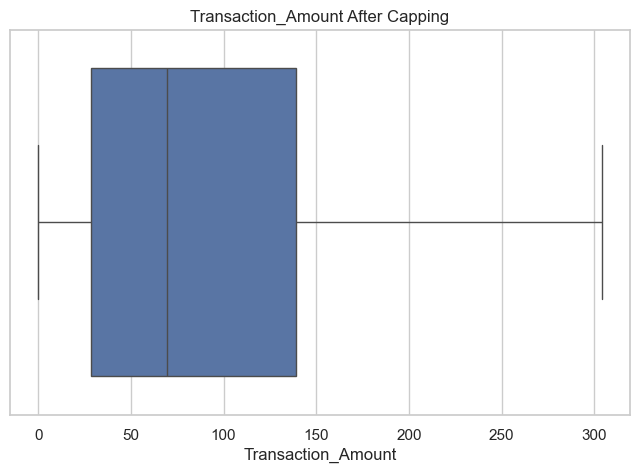

In [10]:
import numpy as np

df_capped = df.copy()

# Get IQR upper bound for Transaction_Amount
Q1_amount = df_capped['Transaction_Amount'].quantile(0.25)
Q3_amount = df_capped['Transaction_Amount'].quantile(0.75)
IQR_amount = Q3_amount - Q1_amount
upper_bound_amount = Q3_amount + 1.5 * IQR_amount

print(f"\nCapping Transaction_Amount at: {upper_bound_amount:.2f}")

# Capping the Transaction_Amount column (overwrite original)
df_capped['Transaction_Amount'] = np.where(
    df_capped['Transaction_Amount'] > upper_bound_amount,
    upper_bound_amount,
    df_capped['Transaction_Amount']
)

# Descriptive statistics after capping
print("\nTransaction_Amount descriptive stats (after capping):")
print(df_capped['Transaction_Amount'].describe())

# Boxplot after capping
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_capped['Transaction_Amount'])
plt.title('Transaction_Amount After Capping')
plt.show()

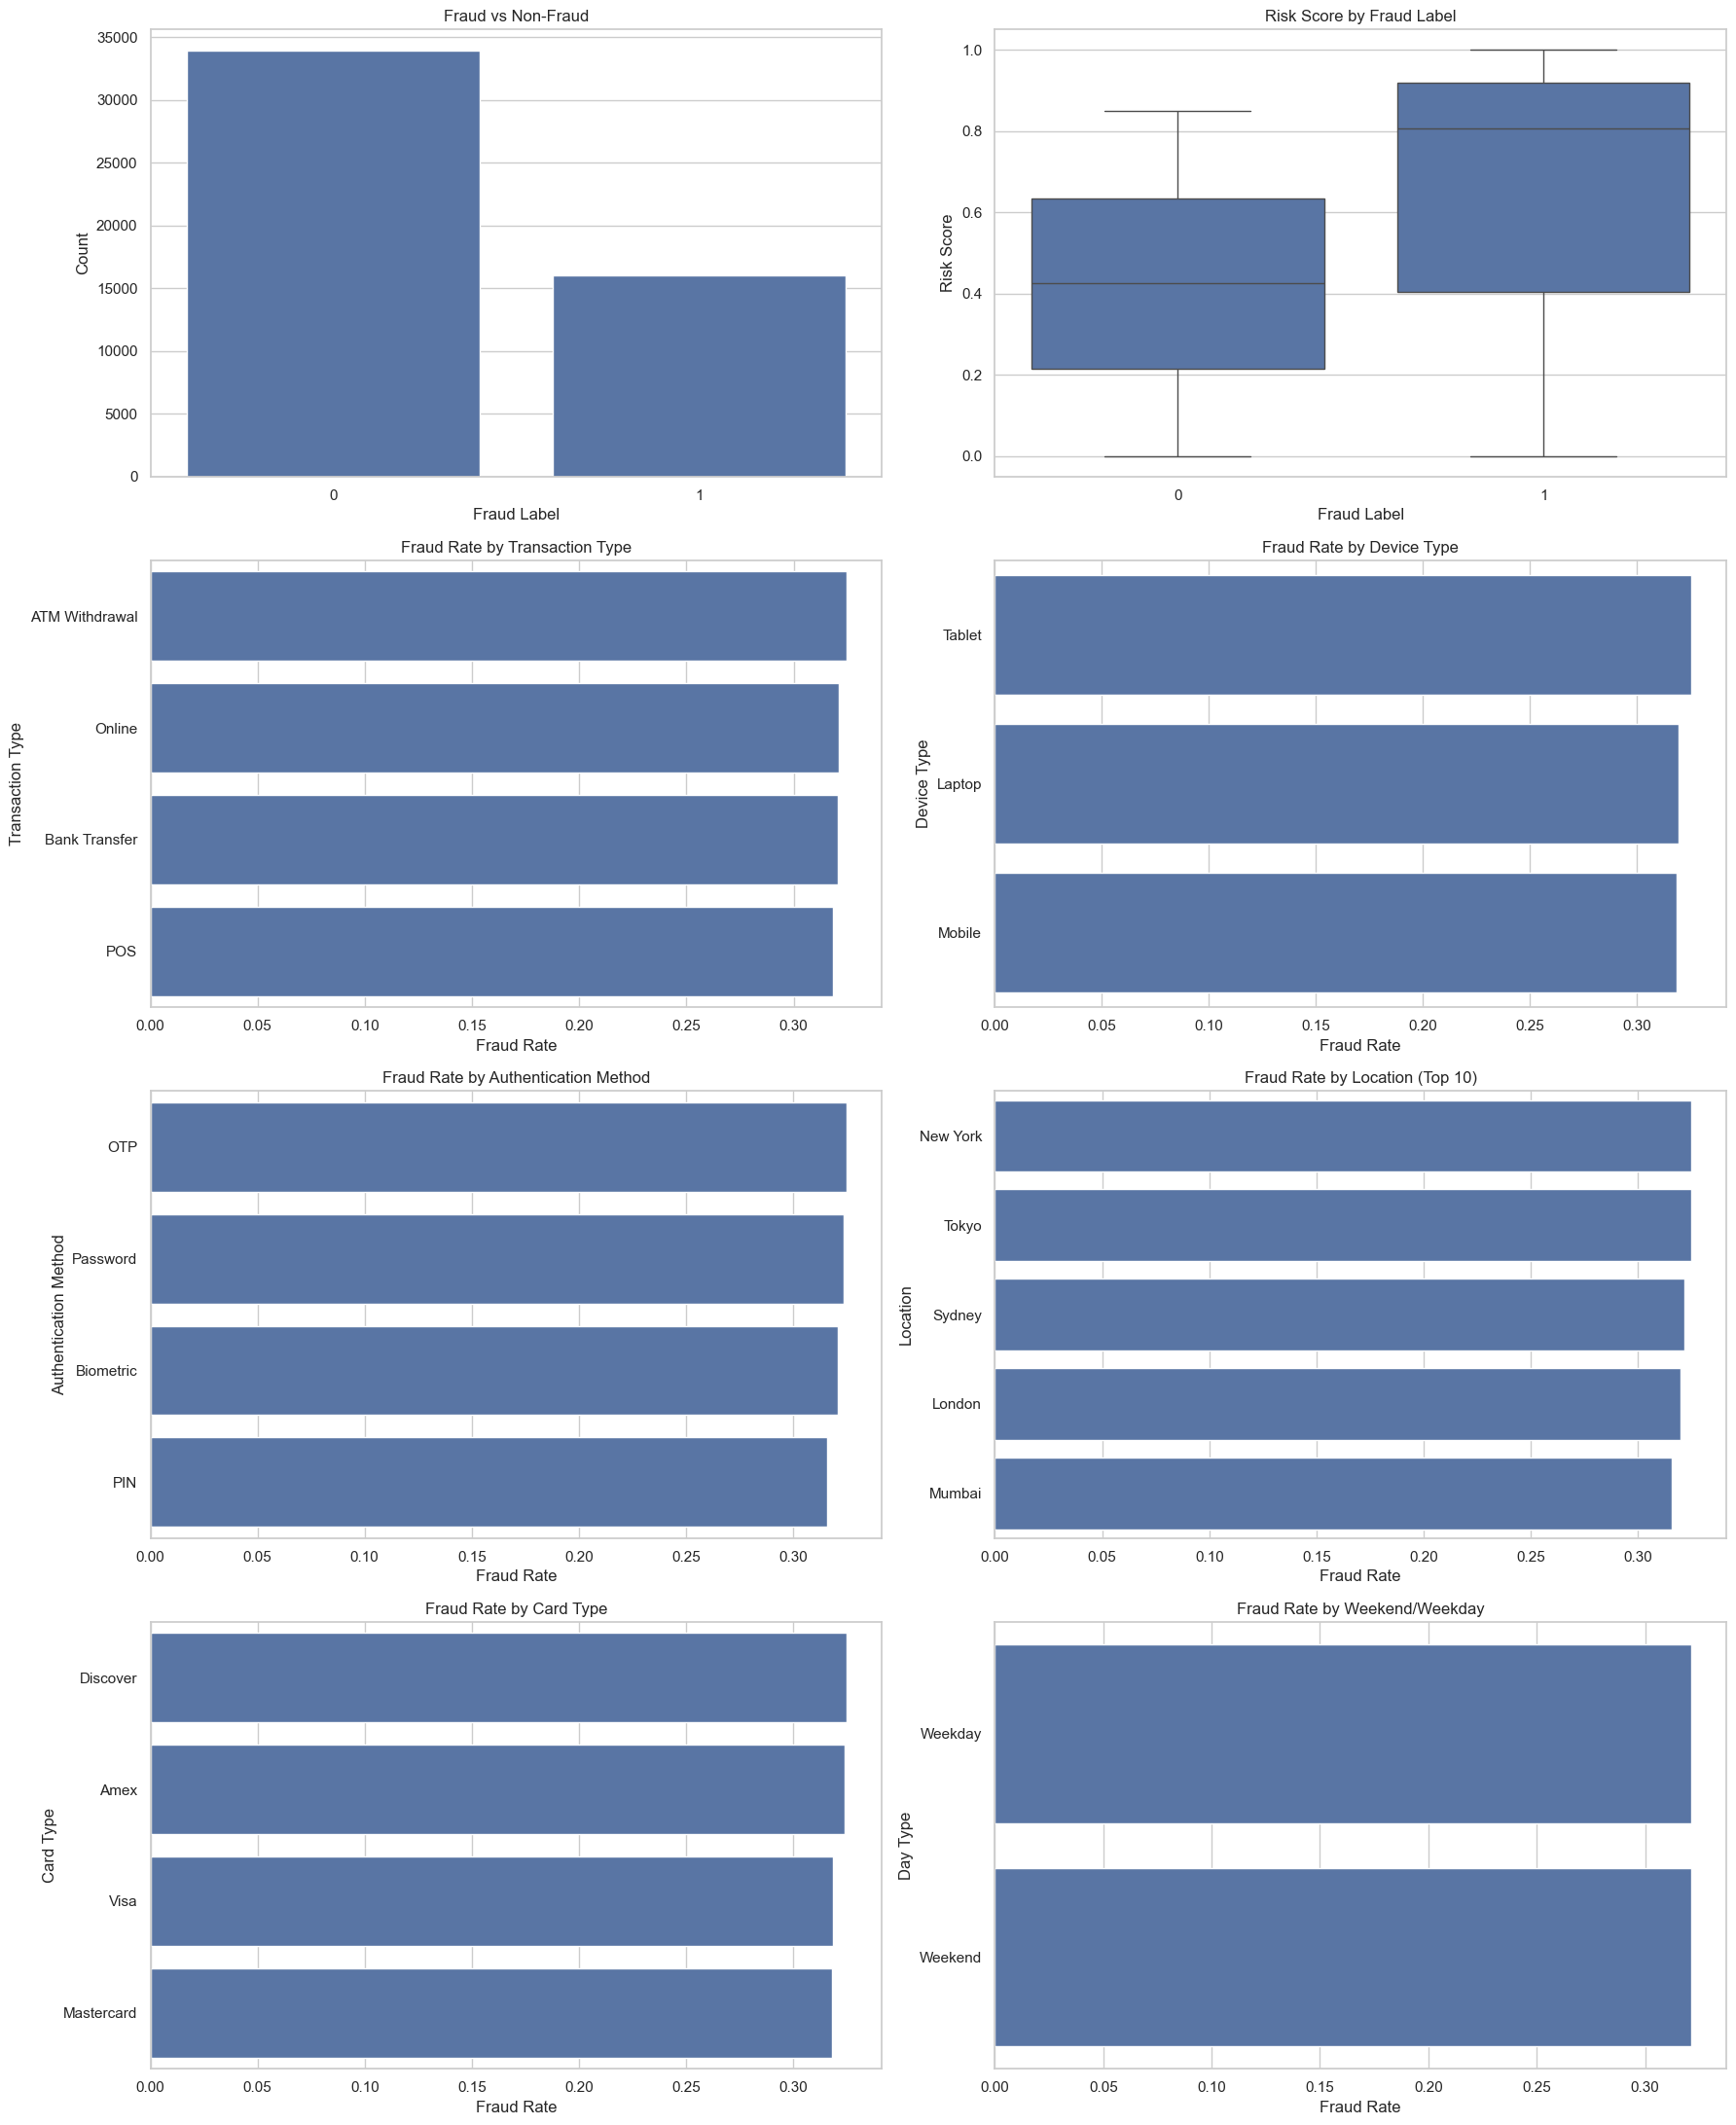

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn style
sns.set(style="whitegrid")

# Calculate fraud rate
fraud_rate_by_type = df.groupby('Transaction_Type')['Fraud_Label'].mean().sort_values(ascending=False)
device_fraud_rate = df.groupby('Device_Type')['Fraud_Label'].mean().sort_values(ascending=False)
auth_fraud_rate = df.groupby('Authentication_Method')['Fraud_Label'].mean().sort_values(ascending=False)
location_fraud_rate = df.groupby('Location')['Fraud_Label'].mean().sort_values(ascending=False)
card_fraud_rate = df.groupby('Card_Type')['Fraud_Label'].mean().sort_values(ascending=False)
merchant_fraud_rate = df.groupby('Merchant_Category')['Fraud_Label'].mean().sort_values(ascending=False)
weekend_fraud_rate = df.groupby('Is_Weekend')['Fraud_Label'].mean().sort_values(ascending=False)

fig, axs = plt.subplots(4, 2, figsize=(18, 22))

# Figure 1: Fraud vs Non-Fraud count
sns.countplot(x='Fraud_Label', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Fraud vs Non-Fraud')
axs[0, 0].set_xlabel('Fraud Label')
axs[0, 0].set_ylabel('Count')

# Figure 2: Risk Score by Fraud
sns.boxplot(x='Fraud_Label', y='Risk_Score', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Risk Score by Fraud Label')
axs[0, 1].set_xlabel('Fraud Label')
axs[0, 1].set_ylabel('Risk Score')

# Figure 3: Transaction Type fraud rate
sns.barplot(x=fraud_rate_by_type.values, y=fraud_rate_by_type.index, ax=axs[1, 0])
axs[1, 0].set_title('Fraud Rate by Transaction Type')
axs[1, 0].set_xlabel('Fraud Rate')
axs[1, 0].set_ylabel('Transaction Type')

# Figure 4: Device Type fraud rate
sns.barplot(x=device_fraud_rate.values, y=device_fraud_rate.index, ax=axs[1, 1])
axs[1, 1].set_title('Fraud Rate by Device Type')
axs[1, 1].set_xlabel('Fraud Rate')
axs[1, 1].set_ylabel('Device Type')

# Figure 5: Authentication Method fraud rate
sns.barplot(x=auth_fraud_rate.values, y=auth_fraud_rate.index, ax=axs[2, 0])
axs[2, 0].set_title('Fraud Rate by Authentication Method')
axs[2, 0].set_xlabel('Fraud Rate')
axs[2, 0].set_ylabel('Authentication Method')

# Figure 6: Location fraud rate (Top 10)
top_locations = location_fraud_rate.head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, ax=axs[2, 1])
axs[2, 1].set_title('Fraud Rate by Location (Top 10)')
axs[2, 1].set_xlabel('Fraud Rate')
axs[2, 1].set_ylabel('Location')

# Figure 7: Card Type fraud rate
sns.barplot(x=card_fraud_rate.values, y=card_fraud_rate.index, ax=axs[3, 0])
axs[3, 0].set_title('Fraud Rate by Card Type')
axs[3, 0].set_xlabel('Fraud Rate')
axs[3, 0].set_ylabel('Card Type')

# Figure 8: Is_Weekend fraud rate
weekend_labels = ['Weekday', 'Weekend']
sns.barplot(x=weekend_fraud_rate.values, y=weekend_labels, ax=axs[3, 1])
axs[3, 1].set_title('Fraud Rate by Weekend/Weekday')
axs[3, 1].set_xlabel('Fraud Rate')
axs[3, 1].set_ylabel('Day Type')

# Automatic adjustment of subgraph spacing
plt.tight_layout()
plt.show()

Plotting Fraud vs Non-Fraud Count...
Plotting Transaction Amount Distribution by Fraud Class...
Plotting Risk Score vs Fraud_Label...
Plotting Fraud Rate by Transaction Type...
Plotting Fraud Rate by Device Type...
Plotting Fraud Rate by Authentication Method...
Plotting Fraud Rate by Card Type...
Plotting Fraud vs Non-Fraud by Hour of Day...

Arranging and displaying plots...


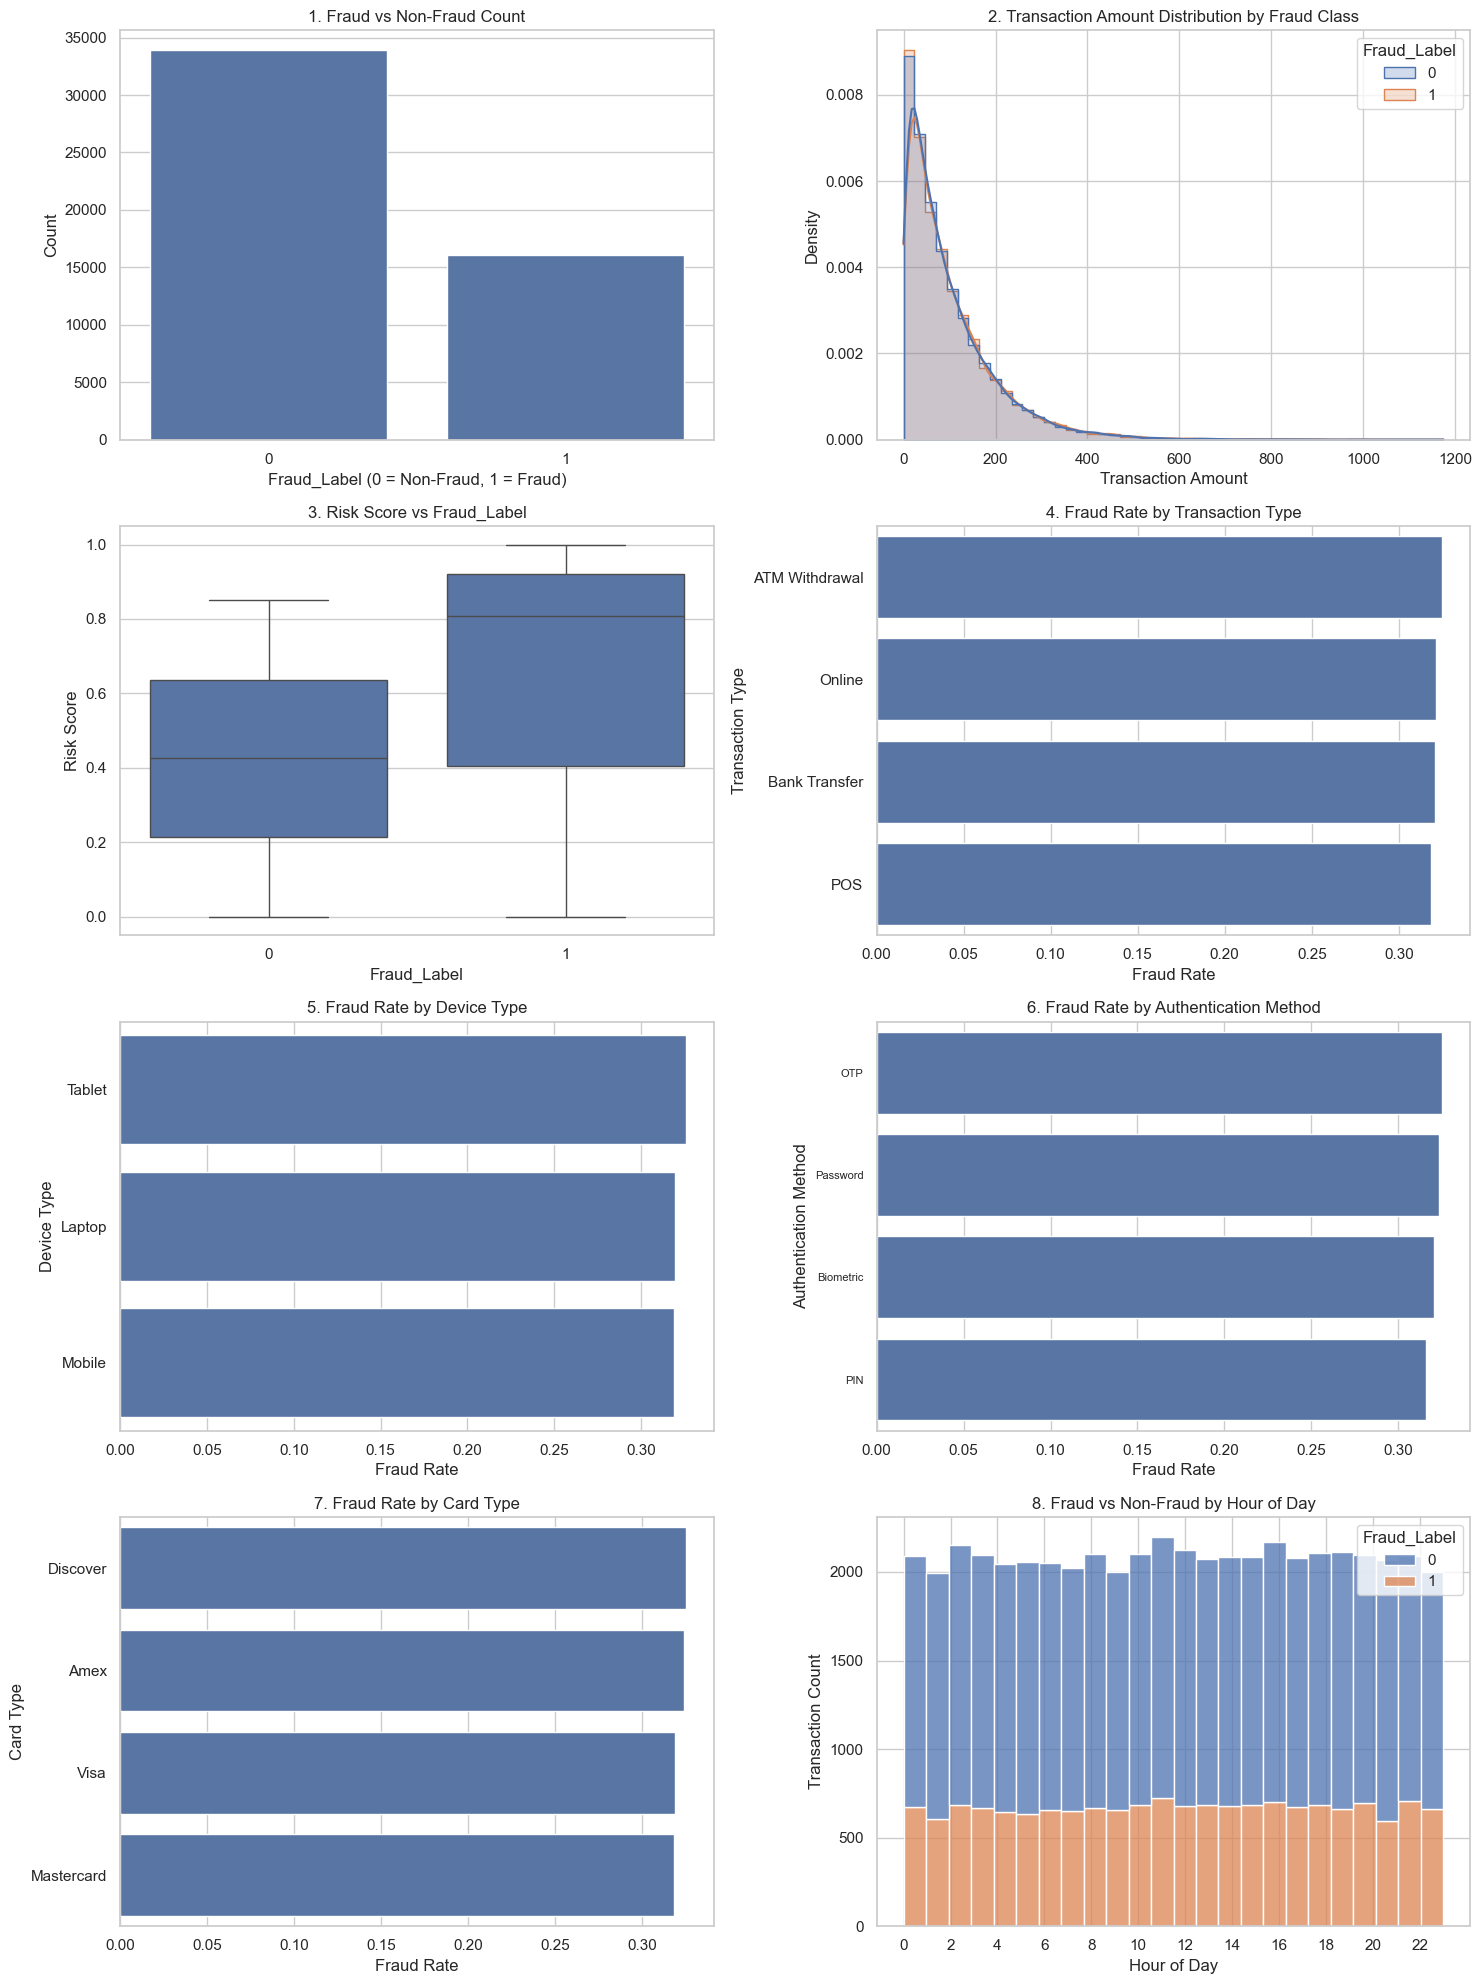

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style for better aesthetics
sns.set(style="whitegrid")
# Adjust overall figure size to accommodate 8 plots in 2 columns clearly
# You might need to tweak figsize depending on your screen/resolution
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
# Flatten the axes array for easier indexing
axs = axs.flatten()

# 1. Fraud vs Non-Fraud distribution
print("Plotting Fraud vs Non-Fraud Count...")
sns.countplot(x='Fraud_Label', data=df, ax=axs[0])
axs[0].set_title('1. Fraud vs Non-Fraud Count')
axs[0].set_xlabel('Fraud_Label (0 = Non-Fraud, 1 = Fraud)')
axs[0].set_ylabel('Count')


# 2. Distribution of transaction amounts by fraud label
print("Plotting Transaction Amount Distribution by Fraud Class...")
# Using original Transaction_Amount for visualization as in your example
sns.histplot(data=df, x='Transaction_Amount', hue='Fraud_Label',
             bins=50, kde=True, element="step", stat="density", common_norm=False, ax=axs[1])
axs[1].set_title('2. Transaction Amount Distribution by Fraud Class')
axs[1].set_xlabel('Transaction Amount')
axs[1].set_ylabel('Density')


# 3. Risk Score distribution by fraud label
print("Plotting Risk Score vs Fraud_Label...")
sns.boxplot(x='Fraud_Label', y='Risk_Score', data=df, ax=axs[2])
axs[2].set_title('3. Risk Score vs Fraud_Label')
axs[2].set_xlabel('Fraud_Label')
axs[2].set_ylabel('Risk Score')


# 4. Fraud rate by Transaction Type
print("Plotting Fraud Rate by Transaction Type...")
# Calculate fraud rate
if 'Transaction_Type' in df.columns and 'Fraud_Label' in df.columns:
    fraud_rate_by_type = df.groupby('Transaction_Type')['Fraud_Label'].mean().sort_values(ascending=False)
    sns.barplot(x=fraud_rate_by_type.values, y=fraud_rate_by_type.index, ax=axs[3])
    axs[3].set_title('4. Fraud Rate by Transaction Type')
    axs[3].set_xlabel('Fraud Rate')
    axs[3].set_ylabel('Transaction Type')
else:
    axs[3].set_title('4. Transaction Type data missing')
    axs[3].text(0.5, 0.5, 'Data Not Available', horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes) # Placeholder


# 5. Fraud rate by Device Type
print("Plotting Fraud Rate by Device Type...")
if 'Device_Type' in df.columns and 'Fraud_Label' in df.columns:
    device_fraud_rate = df.groupby('Device_Type')['Fraud_Label'].mean().sort_values(ascending=False)
    sns.barplot(x=device_fraud_rate.values, y=device_fraud_rate.index, ax=axs[4])
    axs[4].set_title('5. Fraud Rate by Device Type')
    axs[4].set_xlabel('Fraud Rate')
    axs[4].set_ylabel('Device Type')
else:
     axs[4].set_title('5. Device Type data missing')
     axs[4].text(0.5, 0.5, 'Data Not Available', horizontalalignment='center', verticalalignment='center', transform=axs[4].transAxes)


# 6. Fraud rate by Authentication Method
print("Plotting Fraud Rate by Authentication Method...")
if 'Authentication_Method' in df.columns and 'Fraud_Label' in df.columns:
    auth_fraud_rate = df.groupby('Authentication_Method')['Fraud_Label'].mean().sort_values(ascending=False)
    sns.barplot(x=auth_fraud_rate.values, y=auth_fraud_rate.index, ax=axs[5])
    axs[5].set_title('6. Fraud Rate by Authentication Method')
    axs[5].set_xlabel('Fraud Rate')
    axs[5].set_ylabel('Authentication Method')
    axs[5].tick_params(axis='y', labelsize=8) # Adjust label size if needed
else:
     axs[5].set_title('6. Authentication Method data missing')
     axs[5].text(0.5, 0.5, 'Data Not Available', horizontalalignment='center', verticalalignment='center', transform=axs[5].transAxes)


# 7. Fraud rate by Card Type
print("Plotting Fraud Rate by Card Type...")
if 'Card_Type' in df.columns and 'Fraud_Label' in df.columns:
    card_fraud_rate = df.groupby('Card_Type')['Fraud_Label'].mean().sort_values(ascending=False)
    sns.barplot(x=card_fraud_rate.values, y=card_fraud_rate.index, ax=axs[6])
    axs[6].set_title('7. Fraud Rate by Card Type')
    axs[6].set_xlabel('Fraud Rate')
    axs[6].set_ylabel('Card Type')
else:
    axs[6].set_title('7. Card Type data missing')
    axs[6].text(0.5, 0.5, 'Data Not Available', horizontalalignment='center', verticalalignment='center', transform=axs[6].transAxes)


# 8. Fraud by Hour of Day
print("Plotting Fraud vs Non-Fraud by Hour of Day...")
try:
    # Check if Timestamp column exists before processing
    if 'Timestamp' in df.columns:
        # Process Timestamp column (ensure it's done only once if running this block multiple times)
        # We'll create a temporary column 'Hour' for plotting within this block
        if 'Hour' not in df.columns or not pd.api.types.is_integer_dtype(df['Hour']):
             df['Timestamp_dt'] = pd.to_datetime(df['Timestamp'])
             df['Hour_temp'] = df['Timestamp_dt'].dt.hour # Create a temporary hour column
        else:
             # If Hour column already exists (e.g., from previous processing), use it
             df['Hour_temp'] = df['Hour']

        sns.histplot(data=df, x='Hour_temp', hue='Fraud_Label', bins=24, multiple='stack', ax=axs[7])
        axs[7].set_title('8. Fraud vs Non-Fraud by Hour of Day')
        axs[7].set_xlabel('Hour of Day')
        axs[7].set_ylabel('Transaction Count')
        axs[7].set_xticks(range(0, 24, 2)) # Set x-axis ticks for better readability

        # Clean up temporary columns if created
        if 'Timestamp_dt' in df.columns: del df['Timestamp_dt']
        if 'Hour_temp' in df.columns: del df['Hour_temp']

    else:
        axs[7].set_title('8. Timestamp data missing')
        axs[7].text(0.5, 0.5, 'Data Not Available', horizontalalignment='center', verticalalignment='center', transform=axs[7].transAxes)

except Exception as e:
    print("Could not plot Fraud by Hour of Day:", e)
    axs[7].set_title('8. Error plotting Hour')
    axs[7].text(0.5, 0.5, f'Error: {e}', horizontalalignment='center', verticalalignment='center', wrap=True, transform=axs[7].transAxes)


# --- Final Layout and Display ---
print("\nArranging and displaying plots...")
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show()

# Handle Timestamp and Categorical Features

In [54]:
# Convert and extract datetime features
df_capped['Timestamp'] = pd.to_datetime(df_capped['Timestamp'])

df_capped['Transaction_Hour'] = df_capped['Timestamp'].dt.hour
df_capped['Transaction_DayOfWeek'] = df_capped['Timestamp'].dt.dayofweek
df_capped['Transaction_Month'] = df_capped['Timestamp'].dt.month
df_capped['Transaction_Day'] = df_capped['Timestamp'].dt.day
df_capped['Is_Weekend'] = (df_capped['Transaction_DayOfWeek'] >= 5).astype(int)

df_capped.drop(columns=['Timestamp'], inplace=True)
print("✔ Timestamp processed and dropped.")

✔ Timestamp processed and dropped.


In [56]:
categorical_cols = [
    'Transaction_Type', 'Device_Type', 'Location', 
    'Merchant_Category', 'Card_Type', 'Authentication_Method'
]
existing_cat_cols = [col for col in categorical_cols if col in df_capped.columns]

df_capped = pd.get_dummies(df_capped, columns=existing_cat_cols, drop_first=True)
print(f"✔ One-hot encoded: {existing_cat_cols}")

✔ One-hot encoded: ['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Card_Type', 'Authentication_Method']


In [58]:
cols_to_drop = ['Transaction_ID', 'User_ID', 'Transaction_Amount']
df_capped.drop(columns=[col for col in cols_to_drop if col in df_capped.columns], inplace=True)
print(f"✔ Dropped unnecessary columns: {cols_to_drop}")

✔ Dropped unnecessary columns: ['Transaction_ID', 'User_ID', 'Transaction_Amount']


In [60]:
from sklearn.model_selection import train_test_split

X = df_capped.drop(columns=['Fraud_Label'])
y = df_capped['Fraud_Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

print(f"✔ Dataset split: X_train {X_train.shape}, X_test {X_test.shape}")

✔ Dataset split: X_train (37500, 33), X_test (12500, 33)


In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"✔ After SMOTE: {X_train_resampled.shape}, Class distribution: \n{y_train_resampled.value_counts()}")

✔ After SMOTE: (50900, 33), Class distribution: 
Fraud_Label
0    25450
1    25450
Name: count, dtype: int64


In [64]:
from sklearn.preprocessing import StandardScaler

scale_cols = [
    'Account_Balance', 'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
    'Failed_Transaction_Count_7d', 'Card_Age', 'Transaction_Distance', 
    'Risk_Score', 'Transaction_Amount_Capped', 'Transaction_Hour', 
    'Transaction_DayOfWeek', 'Transaction_Month', 'Transaction_Day'
]
scale_cols = [col for col in scale_cols if col in X_train_resampled.columns]

scaler = StandardScaler()
X_train_resampled[scale_cols] = scaler.fit_transform(X_train_resampled[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

print("✔ Feature scaling completed.")

✔ Feature scaling completed.



▶️ Training XGBoost model...


D:\anaconda1\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:36:47] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Model training complete.

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8483
           1       1.00      1.00      1.00      4017

    accuracy                           1.00     12500
   macro avg       1.00      1.00      1.00     12500
weighted avg       1.00      1.00      1.00     12500


📊 Confusion Matrix:


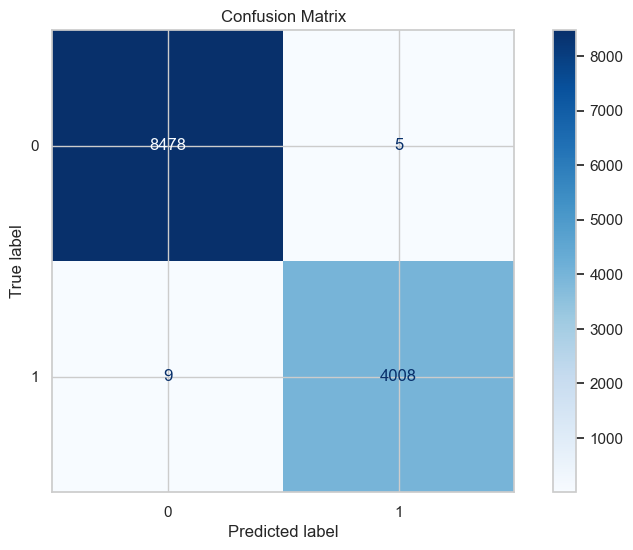

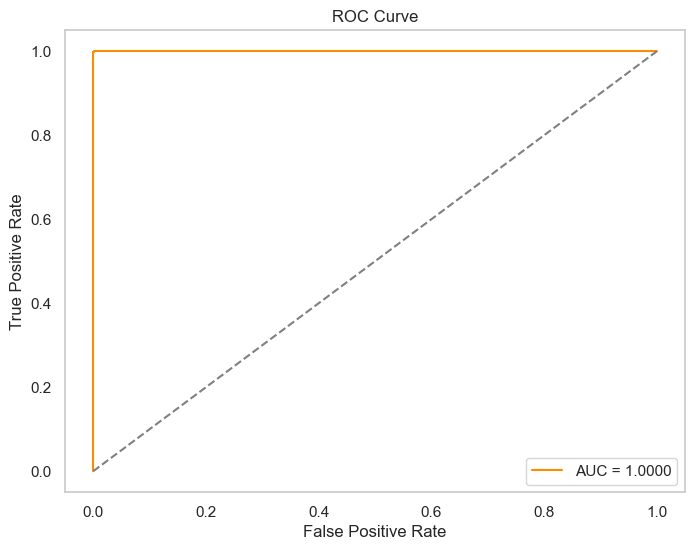

✅ AUC-ROC Score: 1.0000


<Figure size 1000x800 with 0 Axes>

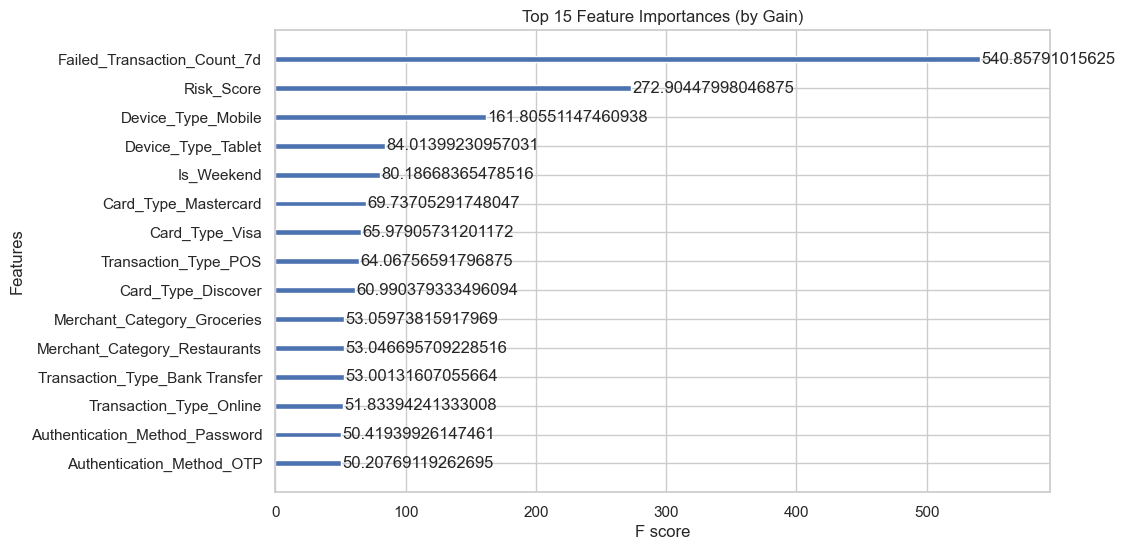

In [66]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define and train model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

print("\n▶️ Training XGBoost model...")
xgb_model.fit(X_train_resampled, y_train_resampled)
print("✅ Model training complete.\n")

# 2. Make predictions
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# 3. Evaluation metrics
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 4. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

print(f"✅ AUC-ROC Score: {auc_score:.4f}")

# 5. Feature Importance
plt.figure(figsize=(10, 8))
plot_importance(xgb_model, max_num_features=15, importance_type='gain')
plt.title("Top 15 Feature Importances (by Gain)")
plt.show()

In [68]:
# Drop Risk_Score from training and test sets
if 'Risk_Score' in X_train_resampled.columns:
    X_train_resampled.drop(columns=['Risk_Score'], inplace=True)
    X_test.drop(columns=['Risk_Score'], inplace=True)
    print("🔍 Dropped 'Risk_Score' from training and test sets.")
else:
    print("ℹ️ 'Risk_Score' not found in feature set.")

🔍 Dropped 'Risk_Score' from training and test sets.


In [72]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize model
xgb_model = XGBClassifier(random_state=42, n_jobs=-1)

# Train the model
print("\n▶️ Training XGBoost model (without 'Risk_Score')...")
xgb_model.fit(X_train_resampled, y_train_resampled)
print("✅ Model training complete.")


▶️ Training XGBoost model (without 'Risk_Score')...
✅ Model training complete.



📊 Classification Report (without 'Risk_Score'):

              precision    recall  f1-score   support

           0       0.85      1.00      0.91      8483
           1       0.98      0.62      0.76      4017

    accuracy                           0.87     12500
   macro avg       0.92      0.81      0.84     12500
weighted avg       0.89      0.87      0.86     12500

📊 Confusion Matrix:



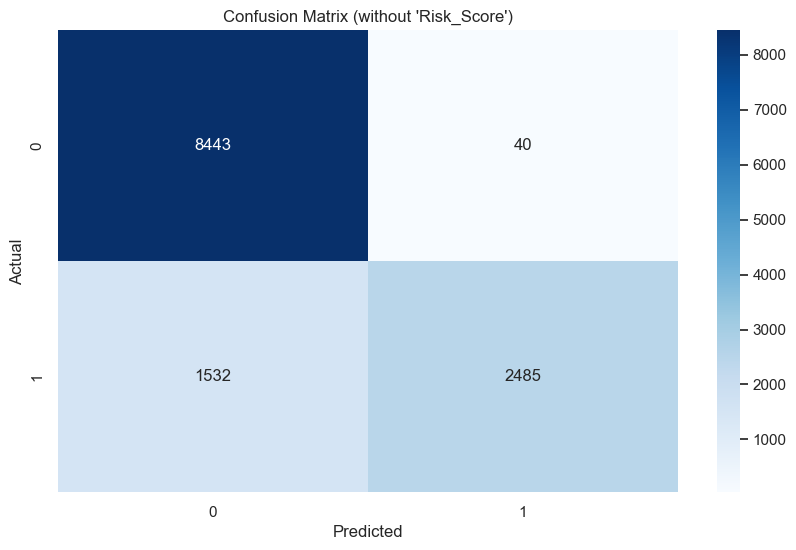

In [74]:
# Predict on the original test set
y_pred = xgb_model.predict(X_test)

# Classification Report
print("\n📊 Classification Report (without 'Risk_Score'):\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("📊 Confusion Matrix:\n")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (without 'Risk_Score')")
plt.show()


▶️ Training Random Forest...

📊 Classification Report: Random Forest
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8483
           1       1.00      0.62      0.76      4017

    accuracy                           0.88     12500
   macro avg       0.92      0.81      0.84     12500
weighted avg       0.90      0.88      0.87     12500

📊 Confusion Matrix: Random Forest


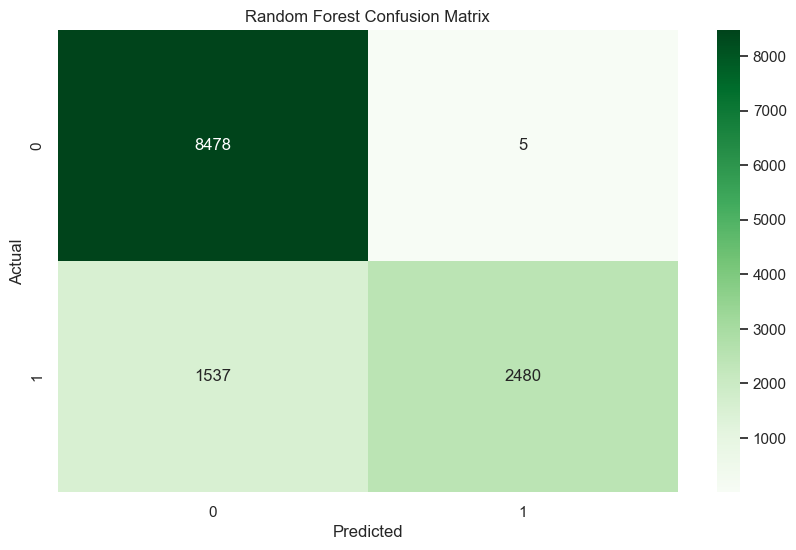

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

print("\n▶️ Training Random Forest...")
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)

print("\n📊 Classification Report: Random Forest")
print(classification_report(y_test, y_pred_rf))

print("📊 Confusion Matrix: Random Forest")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


▶️ Training Logistic Regression...

📊 Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      8483
           1       0.60      0.62      0.61      4017

    accuracy                           0.74     12500
   macro avg       0.71      0.71      0.71     12500
weighted avg       0.75      0.74      0.75     12500

📊 Confusion Matrix: Logistic Regression


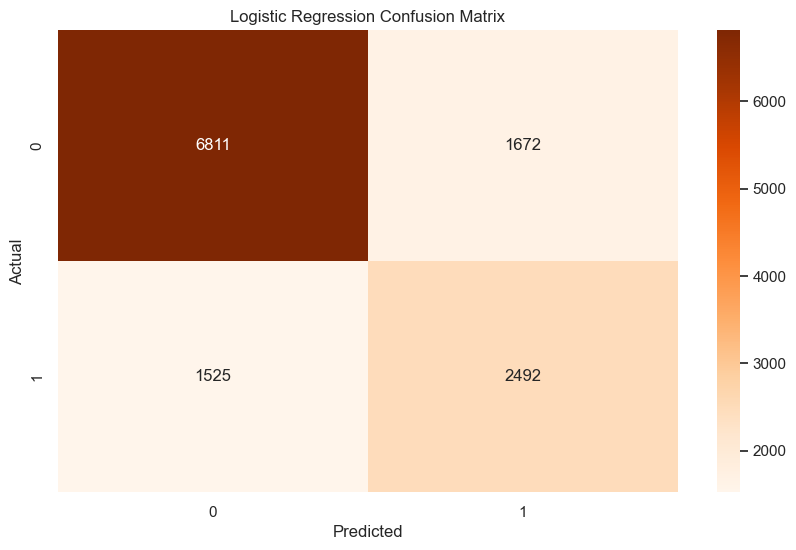

In [78]:
from sklearn.linear_model import LogisticRegression

print("\n▶️ Training Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

y_pred_lr = lr_model.predict(X_test)

print("\n📊 Classification Report: Logistic Regression")
print(classification_report(y_test, y_pred_lr))

print("📊 Confusion Matrix: Logistic Regression")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Oranges')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


▶️ Training Neural Network (MLP)...

📊 Classification Report: Neural Network (MLP)
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      8483
           1       0.77      0.65      0.71      4017

    accuracy                           0.83     12500
   macro avg       0.81      0.78      0.79     12500
weighted avg       0.82      0.83      0.82     12500

📊 Confusion Matrix: Neural Network (MLP)


D:\anaconda1\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


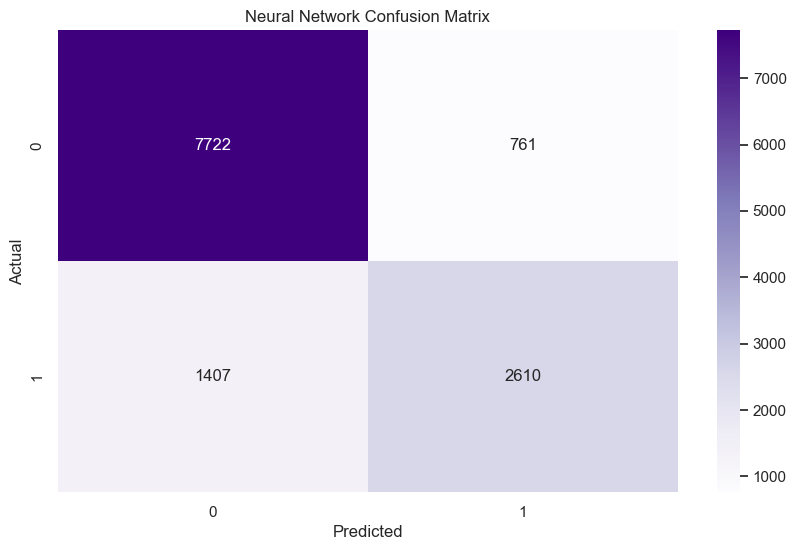

In [80]:
from sklearn.neural_network import MLPClassifier

print("\n▶️ Training Neural Network (MLP)...")
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
mlp_model.fit(X_train_resampled, y_train_resampled)

y_pred_mlp = mlp_model.predict(X_test)

print("\n📊 Classification Report: Neural Network (MLP)")
print(classification_report(y_test, y_pred_mlp))

print("📊 Confusion Matrix: Neural Network (MLP)")
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, fmt='d', cmap='Purples')
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()